In [223]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv('C:/Users/gokul/Documents/Machine_Learning/machine-learning-ex2/ex2/OnlineNewsPopularity1.csv')
del data['url']

data = data.rename(columns=lambda x: x.strip())


In [224]:
data1 = data.div(data.sum(axis=1), axis =0)

In [225]:
#normalizing (continuous to discrete) , don't repeat more than once 

data['timedelta'] = (data['timedelta']<=164)*1 | ((data['timedelta']>164) & (data['timedelta']<=339))*2 | ((data['timedelta']>339) & (data['timedelta']<542))*3 |(data['timedelta']>=542)*4
data['n_tokens_title'] = (data['n_tokens_title']<=9)*1 | ((data['n_tokens_title']>9) & (data['n_tokens_title']<=10))*2 | ((data['n_tokens_title']>10) & (data['n_tokens_title']<12))*3 |(data['n_tokens_title']>=12)*4
data['n_tokens_content'] = (data['n_tokens_content']<=246)*1 | ((data['n_tokens_content']>246) & (data['n_tokens_content']<=409))*2 | ((data['n_tokens_content']>409) & (data['n_tokens_content']<716))*3 |(data['n_tokens_content']>=716)*4
data['num_hrefs'] = (data['num_hrefs']<=4)*1 | ((data['num_hrefs']>4) & (data['num_hrefs']<=8))*2 | ((data['num_hrefs']>8) & (data['num_hrefs']<14))*3 |(data['num_hrefs']>=14)*4
data['num_imgs'] = (data['num_imgs']<=2)*1 |  (data['num_imgs']>2)*2
data['num_videos'] = (data['num_videos']<1)*1 |  (data['num_videos']>=1)*2
data['num_keywords'] = (data['num_keywords']<=6)*1 | ((data['num_keywords']>6) & (data['num_keywords']<=7))*2 | ((data['num_keywords']>7) & (data['num_keywords']<9))*3 |(data['num_keywords']>=9)*4

In [226]:
data1['timedelta'] = data['timedelta']
data1['n_tokens_title'] = data['n_tokens_title']
data1['n_tokens_content'] = data['n_tokens_content']
data1['num_hrefs'] = data['num_hrefs']
data1['num_imgs'] = data['num_imgs']
data1['num_videos'] = data['num_videos']
data1['num_keywords'] = data['num_keywords']
data1.describe()
data1.shape

(39644, 62)

In [227]:
data1['timedelta'].describe()

count    39644.000000
mean         2.499697
std          1.119784
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          4.000000
Name: timedelta, dtype: float64

In [228]:
type(data1)
data1.dtypes
data_columns = data.columns
data['weekday_is_monday'] = data['weekday_is_monday'].astype(int)
data['weekday_is_tuesday'] = data['weekday_is_tuesday'].astype(int)
data['weekday_is_wednesday'] = data['weekday_is_wednesday'].astype(int)
data['weekday_is_thursday'] = data['weekday_is_thursday'].astype(int)
data['weekday_is_friday'] = data['weekday_is_friday'].astype(int)
data['weekday_is_saturday'] = data['weekday_is_saturday'].astype(int)
data['weekday_is_sunday'] = data['weekday_is_sunday'].astype(int)

In [229]:
del data1['log_share']
del data1['Classify_2']
#data1.columns
import numpy as np
data1['log_share'] = np.log2(data.shares)

In [230]:
data1['log_share'].describe()
data1.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_share
count,39644.000000,39644.000000,39644.000000,3.964400e+04,3.964400e+04,3.964400e+04,39644.000000,3.964400e+04,39644.000000,39644.000000,...,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,39644.000000
mean,2.499697,2.420442,2.499748,1.124453e-06,2.001114e-06,1.417305e-06,2.431894,6.161904e-06,1.291923,1.368732,...,1.514007e-06,-4.979859e-07,-9.690989e-07,-2.196927e-07,5.314102e-07,1.462971e-07,7.063799e-07,3.020870e-07,5.192440e-03,10.783936
std,1.119784,1.233442,1.118725,8.292824e-06,1.364938e-05,1.023815e-05,1.129743,3.212354e-05,0.454653,0.482467,...,9.232829e-06,2.921378e-06,5.559205e-06,1.761469e-06,4.319437e-06,3.376223e-06,5.750120e-06,3.365862e-06,2.059512e-02,1.342408
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,1.000000,1.000000,...,0.000000e+00,-2.014584e-04,-4.243680e-04,-2.014584e-04,0.000000e+00,-2.121840e-04,0.000000e+00,0.000000e+00,7.689477e-07,0.000000
25%,1.000000,1.000000,1.000000,4.093986e-07,8.142868e-07,5.354116e-07,1.000000,9.380781e-07,1.000000,1.000000,...,5.207079e-07,-3.199605e-07,-7.267370e-07,-1.308306e-07,0.000000e+00,0.000000e+00,1.481113e-07,0.000000e+00,8.631687e-04,9.885696
50%,2.000000,2.000000,2.000000,4.832700e-07,8.979894e-07,6.182126e-07,2.000000,2.379848e-06,1.000000,1.000000,...,7.287944e-07,-2.363235e-07,-4.764837e-07,-8.765518e-08,1.388362e-07,0.000000e+00,3.857073e-07,0.000000e+00,1.407194e-03,10.451211
75%,4.000000,4.000000,4.000000,5.805524e-07,9.839532e-07,7.253792e-07,4.000000,4.317544e-06,2.000000,2.000000,...,9.045937e-07,-1.689669e-07,-2.844277e-07,-4.647651e-08,4.684069e-07,1.483976e-07,4.637227e-07,2.367389e-07,3.267052e-03,11.451211
max,4.000000,4.000000,4.000000,5.725148e-04,8.510135e-04,6.715829e-04,4.000000,1.520112e-03,2.000000,2.000000,...,6.406967e-04,0.000000e+00,0.000000e+00,0.000000e+00,5.134154e-04,5.134154e-04,3.718980e-04,5.134154e-04,8.308337e-01,19.685686


In [231]:
data1['share_rank'] = (data1['log_share']<=10.45)*1 |(data1['log_share']>10.45)*2

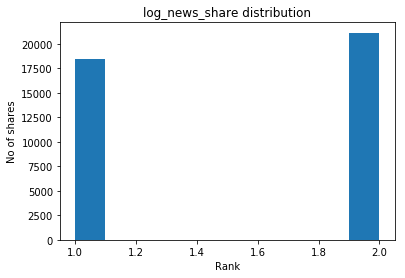

In [232]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.hist(data1['share_rank'])
plt.xlabel('Rank')
plt.ylabel('No of shares')
plt.title('log_news_share distribution')
plt.show()

In [233]:
data1['share_rank'].describe()

count    39644.000000
mean         1.533599
std          0.498876
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: share_rank, dtype: float64

In [234]:
data1.columns
del data1['shares']
del data1['log_share']
Influence_feature = ['timedelta', 'n_tokens_title', 'n_tokens_content', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
       'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'avg_negative_polarity', 'max_negative_polarity',
       'abs_title_subjectivity', 'abs_title_sentiment_polarity']

In [235]:
y = data1[['share_rank']].copy()
type(y)

pandas.core.frame.DataFrame

In [236]:
X = data1[Influence_feature].copy()


In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=324)

In [238]:
rank_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
rank_classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [239]:
Predictions = rank_classifier.predict(X_test)

In [240]:
Predictions[:10]

array([2, 1, 1, 1, 1, 2, 2, 1, 2, 1], dtype=int32)

In [217]:
y_test['share_rank'][:10]

35205    2
15882    2
23584    1
25354    1
25593    1
22305    2
27533    2
36710    1
12978    1
13322    1
Name: share_rank, dtype: int32

In [241]:
accuracy_score(y_true = y_test, y_pred = Predictions)

0.62194199243379567